## Storytelling :

### No contexto pandêmico, a compra e venda de vinhos online intensificou-se e um produtor de vinho na França deseja que você crie um modelo de classificação em relação às características da composição de dois estilos de vinhos, o vinho branco e vermelho.

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
#Leitura de arquivo
df = pd.read_csv('wine_dataset.csv')
print(df.shape)
df.head(7)

(6497, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


In [3]:
#Apresentação dos de estatística descritiva sobre as colunas do DataFrame
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
#Busca por valores faltante
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64


In [5]:
#Apresentação dos tipos de dados de cada coluna
print(df.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object


In [6]:
print(df.var())

fixed_acidity              1.680740
volatile_acidity           0.027105
citric_acid                0.021117
residual_sugar            22.636696
chlorides                  0.001227
free_sulfur_dioxide      315.041192
total_sulfur_dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
quality                    0.762575
dtype: float64


## Análise e visualização de dados

In [7]:
#Número de ocorrencias na coluna de acordo com o valor do tipo de dado categórico
unique, counts = np.unique(df['quality'], return_counts = True)
dict(zip(unique, counts))

{3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5}

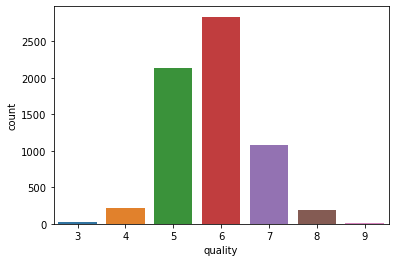

In [8]:
#Gráfico relacionado aos valores apresentados na célula acima
grafico = sns.countplot(x = 'quality', data=df)

In [9]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

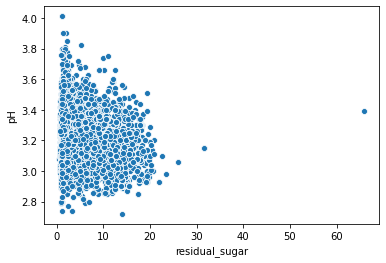

In [10]:
#Gráfico de dispersão do resíduo de açúcar do vinho em relação ao pH
sns.scatterplot(data=df, x="residual_sugar", y="pH")

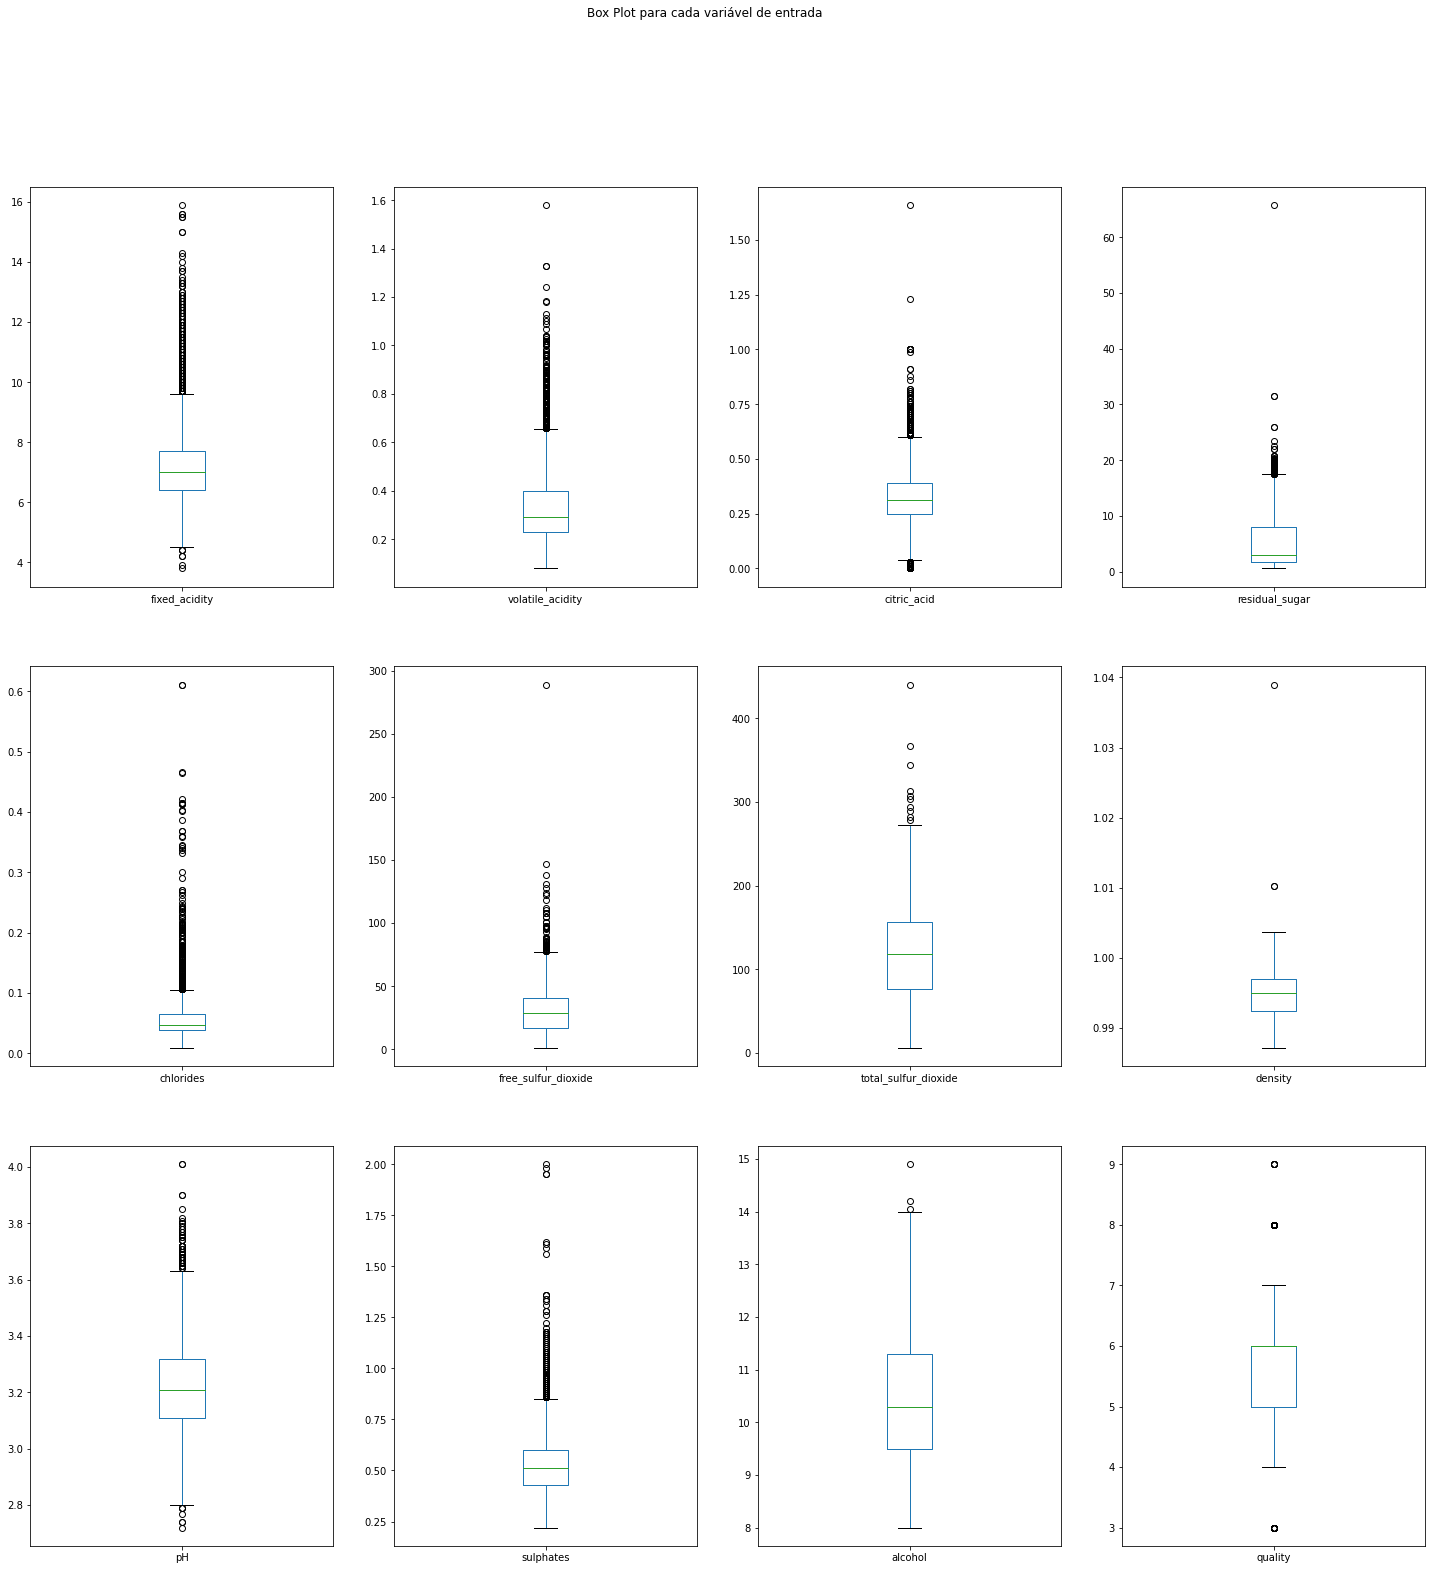

In [11]:
#Gráfico boxplot para cada feature
df.drop('style', axis=1).plot(kind='box', layout=(3,4), subplots=True, sharex=False, sharey=False, figsize=(25,25), title='Box Plot para cada variável de entrada')
plt.show()

In [12]:
#Possível outlier na nossa análise
df.loc[df['residual_sugar'] == df['residual_sugar'].max()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
4380,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white


## Pré-processamento de dados

In [13]:
#Tipos de valores "object" antes da transformação para "category"
df['style'].unique()

array(['red', 'white'], dtype=object)

In [14]:
#Mudança de tipo de dado e utilização do método .cat.codes
df['style'] = df['style'].astype('category').cat.codes 
#método responsável por transformar dados categóricos em categóricos númericos
print(df['style'].unique())

[0 1]


In [15]:
#Separar dados de treino e teste
X_wine = df.drop('style', axis = 1)
#Apresento se minhas colunas preditoras foram separadas da coluna de classe
print(X_wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [16]:
Y_wine = pd.DataFrame(df['style'])
print(Y_wine.columns) #Coluna de classe

Index(['style'], dtype='object')


In [17]:
unique, counts = np.unique(Y_wine, return_counts=True)
dict(zip(unique, counts))

{0: 1599, 1: 4898}

## Seperação de dados de treino e teste

In [18]:
#separarados de forma 80 / 20
#stratify faz com que as proporções de escolha fiquem as mesmas, ou seja, se temos 18% de vinhos brancos e 72% de vinho vermelho
#essa proporção será mantida
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_wine, Y_wine, test_size = 0.20, random_state = 0, stratify = Y_wine)

## Bibliotecas para os modelos de aprendizado de máquina

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

## Classificação : Árvore de decisão

In [20]:
#Escolha do modelo e treino dos dados
modelo = DecisionTreeClassifier(criterion='entropy')
#O critério de entropia se baseia no ganho de informação, que mede a redução de entropia
#Entropia mede a aleatoriedade do atributo alvo.
modelo.fit(X_treino, Y_treino)

DecisionTreeClassifier(criterion='entropy')

In [21]:
previsao = modelo.predict(X_teste)
print(previsao)

[1 1 1 ... 1 1 0]


In [22]:
#gini = 98.4615
#entropy = 98.5384
print(accuracy_score(Y_teste, previsao)*100)

98.53846153846155


[]

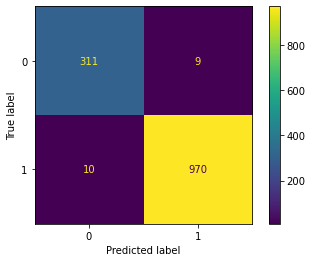

In [23]:
#Gráfico de matriz de confusão
plot_confusion_matrix(modelo, X_teste, Y_teste)
plt.plot()

In [24]:
print(classification_report(Y_teste, previsao))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



## Modelo : Random Forest

In [25]:
#Tamanho dos nossos dados de classe
print(Y_wine.shape)

(6497, 1)


In [26]:
#Tamanho dos nossos dados preditores
print(X_wine.shape)

(6497, 12)


In [27]:
#n_stimators : define quantas árvores teremos no modelo
modelo_random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
#np.ravel() responsáevel por fazer com que Y_treino seja uma matriz 1D (contígua)
modelo_random_forest.fit(X_treino, np.ravel(Y_treino))

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
previsoes_random_forest = modelo_random_forest.predict(X_teste)
print(previsoes_random_forest)

[1 1 1 ... 1 1 0]


In [29]:
#Entropia + n_estimators=10 = accuracy 99.3076
#Gini + n_estimators=10 = accuracy 99.5384
print(accuracy_score(Y_teste, previsoes_random_forest)*100)

99.3076923076923


[]

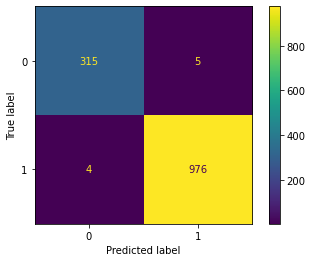

In [30]:
plot_confusion_matrix(modelo_random_forest, X_teste, Y_teste)
plt.plot()

In [31]:
print(classification_report(Y_teste, previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



## Modelo de validação cruzada (Árvore de decisão)

In [46]:
from sklearn.model_selection import cross_val_score, KFold

In [50]:
resultados_arvore = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state = i)
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    score = cross_val_score(arvore, X_wine, Y_wine, cv=kfold)
    #print(score.mean())
    resultados_arvore.append(score.mean())

In [67]:
print(resultados_arvore)

[0.988149105132156, 0.9883027142349177, 0.9862991584686499, 0.9869159653905415, 0.986300106672988, 0.9872257911579947, 0.9856842479554345, 0.9886094583382719, 0.9859950219272253, 0.9866075619295958, 0.9867625933388645, 0.9867621192366954, 0.9863001066729881, 0.9867640156453715, 0.9892253170558256, 0.9886101694915252, 0.9856849591086878, 0.9853786891075027, 0.9859928884674648, 0.9889178617992178, 0.9866077989806803, 0.9869183359013867, 0.9879931255185493, 0.9883024771838331, 0.9866111176958634, 0.9869162024416263, 0.9870693374422188, 0.9858414128244636, 0.9869192841057247, 0.9864560862865946]


## Modelo de validação cruzada (Random Forest)

In [53]:
resultados_random_forest = []

for i in range(30):
    random_forest = RandomForestClassifier(criterion='entropy',  min_samples_leaf=1, min_samples_split=5, n_estimators= 10)
    score = cross_val_score(random_forest, X_wine, np.ravel(Y_wine), cv=kfold)
    resultados_random_forest.append(score.mean())

In [68]:
print(resultados_random_forest)

[0.9938437833353089, 0.9936897001303782, 0.9939969183359014, 0.9938428351309708, 0.9938435462842241, 0.9929202323100629, 0.9936892260282091, 0.9935356169254475, 0.9935349057721939, 0.9941510015408321, 0.9943057958990164, 0.9930738414128246, 0.9935356169254476, 0.9927661491051323, 0.9930733673106555, 0.9929197582078938, 0.9941514756430012, 0.9941507644897477, 0.9935356169254476, 0.9935349057721938, 0.9944591679506933, 0.9941512385919165, 0.9939962071826478, 0.9933815337205167, 0.9944584567974399, 0.9943050847457627, 0.9939969183359014, 0.9933815337205167, 0.9933817707716012, 0.9935363280787008]


In [32]:
#Bibliotecas para uso do PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Redução de dimensionalidade

#### Podemos comparar resultados de random forest e árvores de decisão com a redução de domensionalidade dos meus dados em relação aos modelos anteriores, que tiveram acurácia de :

- Árvore de decisão : 
    - gini = 98.4615
    - entropy = 98.5384
- Random Forest
    - Entropia + n_estimators=10 = accuracy 99.3076
    - Gini + n_estimators=10 = accuracy 99.5384

In [33]:
#Padronização dos dados para que todos estejam na mesma escala
scalonamento_wine = StandardScaler()
X_wine = scalonamento_wine.fit_transform(X_wine)
X_wine

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [34]:
#Separamos os dados de treino e teste em 80 / 20
X_wine_treino, X_wine_teste, Y_wine_treino, Y_wine_teste = train_test_split(X_wine, Y_wine,test_size = 0.20 ,random_state = 0, stratify = Y_wine)

In [35]:
#Visualizamos o corpo dos dados de X
print(X_wine_treino.shape)
print(X_wine_teste.shape)

(5197, 12)
(1300, 12)


In [36]:
#Agora, iremos reduzir nossas dimensões
pca = PCA(n_components=8) #Os atributos mais correlacionados serão unidos

In [37]:
#Ele primeiro treina os dados relacionados ao PCA com a base de treino X
X_wine_treino_pca = pca.fit_transform(X_wine_treino) #Se adapta aos dados
#Aqui, ele não necessita mais do treinamento 
X_wine_teste_pca = pca.transform(X_wine_teste) 

In [38]:
#Ocorreu a redução de atributos
print(X_wine_treino_pca.shape)
print(X_wine_teste_pca.shape)

(5197, 8)
(1300, 8)


#### Se de alguma maneira possamos utilizar todas as features, como antes, teríamos o total de 1.0 de explicação

In [39]:
#Utilizando a redução para 8 features temos a explicação de 0.91 dos dados
print(pca.explained_variance_ratio_.sum())

0.9160111664403634


#### O modelo que teve maior acurácia entre random forest e árvores de decisão foi o de Florestas Aleatótias, logo, iremos utilizar o de árvores a fim de encontrar melhoria na acurácia com a redução de dimensionalidade

In [40]:
modelo_pca = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_pca.fit(X_wine_treino_pca, Y_wine_treino)

DecisionTreeClassifier(random_state=0)

In [41]:
previsoes_pca = modelo_pca.predict(X_wine_teste_pca)
print(previsoes_pca)

[1 1 1 ... 1 1 0]


In [42]:
print(accuracy_score(Y_wine_teste, previsao)*100)

98.53846153846155


#### Comparação de modelos de árvores de decisão com e sem redução de dimensionalidade :

- Árvore de decisão : 
    - gini = 98.4615
- Árvore de decisão com redução de dimensionalidade
    - gini = 98.6153

[]

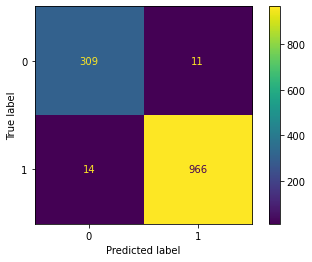

In [43]:
plot_confusion_matrix(modelo_pca, X_wine_teste_pca, Y_wine_teste)
plt.plot()

In [44]:
print(classification_report(Y_wine_teste, previsoes_pca))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300

